<font color='lime'><font size=20>Random forest</font></font>

**Bagging**, short for Bootstrap Aggregation, addresses the issues associated with complex models like fully developed decision trees, which can suffer from overfitting and high variance or too simple trees with high bias. This ensemble technique, introduced by Breiman in 1996, falls under the umbrella of ensemble machine learning, which is divided into two categories: bagging and boosting. Bagging creates multiple bootstrap samples by resampling from the original dataset, ensuring independence and unbias. Each classifier is trained on one of these subsets in parallel, harnessing the concept of collective intelligence. By combining the predictions of these models, bagging retains the strengths of individual trees while mitigating overfitting, resulting in more accurate predictions for new data.

**Random Forests**, introduced by Breiman in 2001, are a specialized class of algorithms that utilize the bagging technique. When training on subsets, they generate **independent and uncorrelated** classification or regression **trees**. The core idea behind Random Forests is to amalgamate information from each tree through either majority voting (for classification) or calculating the average (for regression) to produce the final model estimate. These decision trees are constructed using the same learning algorithm but with variations in the training data, aiming to create diverse and unbiased models to reduce variance.

In the case of Random Forests, even greater randomness is introduced through the random selection of a subset of variables to partition the data (known as the **random subspace method**) (Ho, 1998). This is important because datasets often contain variables with various types of correlations, and using all variables for each split could lead to an ensemble of similar trees. Random Forests leverage the **instability of decision trees**, a characteristic that plays a pivotal role in their effectiveness. If the base classifier is unstable, meaning **minor changes in the training data cause significant shifts in the final decision**, bagging substantially enhances prediction accuracy. However, if the base classifier is stable, bagging may not yield the same improvements as it could reduce accuracy by training on smaller datasets and resulting in an ensemble with a smaller feature space. Therefore, Random Forests **combine "weak" classifiers**, which have slightly better accuracy than random selection, to produce a **"strong" classifier** with improved predictive performance.

The construction of a Random Forest involves two fundamental stages (see picture below):

1.**Bootstrap Sampling**: Create n multiple bootstrap samples, each of which is of the same size as the original dataset or smaller (e.g. k). These samples are generated by randomly selecting data points with replacement from the original data.

2.**Decision Tree Construction**: Construct n decision trees using each bootstrap sample as the training set. During this process, randomly select subsets of the variables (features) to partition the data at each node of the tree. This introduces diversity into the individual trees.

These two stages are repeated as many times as necessary to build a Random Forest. The final model is considered reliable because it utilizes all variables and their various combinations without leaking important information.

In the case of classification tasks, the number of variables allowed for separation at each construction step of the trees typically depends on the square root of the total number of variables (√m). For regression tasks, it depends on the ratio of m/3, where n represents the number of variables or attributes. These guidelines help ensure diversity and randomness in the tree construction process, enhancing the performance of the Random Forest ensemble.

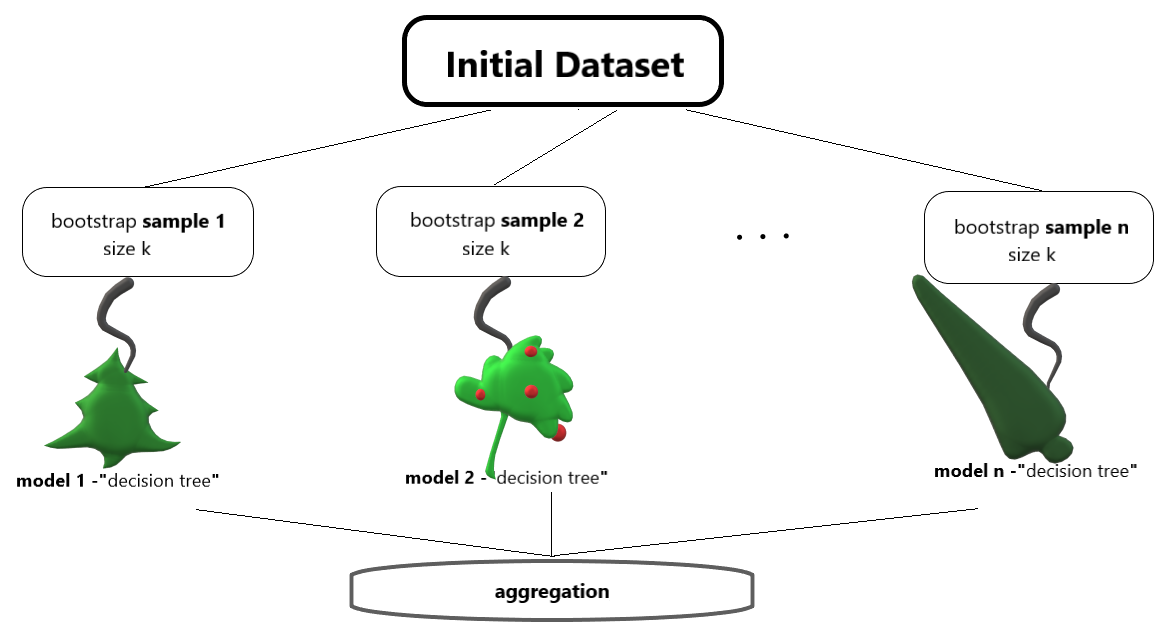

## Advantages and disadvantages of Random Forests:

### Advantages:

1.Reduced Variance and Overfitting: Random forests, despite their complexity, reduce variance and overfitting, especially when hyperparameters are well-tuned, as they grow trees without pruning. This helps them describe relationships between variables more effectively.

2.Correlation Minimization: Random forests minimize correlation between trees by using bootstrap samples and randomly selecting attribute subsets for each tree. This non-correlation leads to more accurate predictions compared to individual trees.

3.Stability: Random forests are stable due to the variety introduced by randomness in their construction. They handle inconsistent, incomplete, and noisy data well without significantly affecting overall performance.

### Disadvantages:

1.Interpretability: Random forests can be challenging to interpret because of their complexity, involving multiple trees and nodes. Deciphering decisions made by the model is not straightforward.

2.High Computational Cost: Training random forests can be computationally expensive, particularly with a large number of trees and nodes. This complexity requires longer training times.

3.Sparse Data Handling: Random forests may not perform well with sparse data, as they rely on resampling and feature homogeneity in bootstrap samples for accurate predictions.



In [1]:
# Importing the necessary packages and libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats
from sklearn.model_selection import train_test_split

In [2]:
# Loading data from excel.

ded=pd.read_excel('CogTEL_new.xlsx')

In [3]:
# Convert object variables to floats and replace '-' with NaN. 
# We need that kind of transformation in order to to handle such variables in Python.

ded['education']=pd.to_numeric(ded['education'],errors='coerce')
ded['GDS_6']=pd.to_numeric(ded['GDS_6'],errors='coerce')
ded['GDS_8']=pd.to_numeric(ded['GDS_8'],errors='coerce')
ded['GDS_9']=pd.to_numeric(ded['GDS_9'],errors='coerce')
ded['NPIJ32F']=pd.to_numeric(ded['NPIJ32F'],errors='coerce')

In [4]:
# Rename the following columns for potential selection in subsequent analysis steps (optional, but acceptable...).

ded = ded.rename(columns={'Antidepressants ': 'Antidepressants' })
ded = ded.rename(columns={'Concentration/attention' : 'Concentration_attention'})

In [5]:
# Removing instances (rows/examples/patients) having missing values.

ded=ded.dropna()

In [6]:
# Displaying the entire dataset.

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [7]:
# Removing patients under the age of 50, or equivalently, keeping those who are 50 and older.

dedomena=ded[ded['Age']>49]

In [8]:
dedomena.shape

(504, 61)

In [9]:
dedomena.describe()

,Age,Sex,education,diagnosis,GDS_1,GDS_2,GDS_3,GDS_4,GDS_5,GDS_6,GDS_7,GDS_8,GDS_9,GDS_10,GDS_11,GDS_12,GDS_13,GDS_14,GDS_15,Antidepressants,MOCA-1,MOCA-2,MOCA-4,MOCA-5,MOCA-6,MOCA-7,MOCA-8,MOCA-9,MOCA-10,MOCA-11,NPIJ32S,NPIJ32F,NPIJ33S,NPIJ33F,NPIJ34S,NPIJ34F,NPIJ35S,NPIJ35F,NPIJ36S,NPIJ36F,NPIJ37S,NPIJ37F,NPIJ38S,NPIJ38F,NPII39J,NPIJ39F,NPIJ40S,NPIJ40F,NPIJ41S,NPIJ41F,NPIJ42S,NPIJ42F,NPIJ43S,NPIJ43F,Prosp_M_r,Vshort_M_r,Vlong_M_r,Work_M_r,Verb_Flu_r,Induct_Reason_r,Concentration_attention
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,70.410714,1.660714,10.392857,0.918651,0.301587,0.496032,0.355159,0.309524,0.394841,0.376984,0.375000,0.230159,0.367063,0.480159,0.095238,0.109127,0.279762,0.244048,0.111111,0.295635,3.335317,2.662698,1.716270,0.922619,2.204365,1.551587,0.305556,1.517857,2.944444,5.503968,0.093254,0.148810,0.077381,0.148810,0.267857,0.567460,0.623016,1.543651,0.855159,2.194444,0.067460,0.107143,0.394841,0.900794,0.033730,0.053571,0.498016,1.168651,0.075397,0.152778,0.466270,1.236111,0.301587,0.742063,0.214286,3.682540,4.738095,5.890873,15.494048,2.349206,3.613095
std,8.826355,0.473937,4.412663,0.955953,0.459403,0.500481,0.479037,0.462757,0.489302,0.485112,0.484604,0.421353,0.482483,0.500103,0.293835,0.312108,0.449328,0.429948,0.314582,0.456781,1.508314,0.728105,0.550486,0.274793,1.148904,0.694567,0.461100,0.715963,1.878223,1.112009,0.464692,0.724245,0.408610,0.710388,0.694825,1.332949,0.860409,1.819400,0.869664,1.828069,0.393047,0.630904,0.788116,1.584618,0.297192,0.453731,0.843638,1.748993,0.401624,0.742405,0.761168,1.751400,0.685201,1.504446,0.410734,1.935956,2.246901,3.111895,8.524783,2.451331,1.927902
min,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,4.000000,9.000000,0.000000,2.000000
50%,70.000000,2.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,6.000000,15.000000,2.000000,5.000000
75%,77.000000,2.000000,14.000000,1.000000,1.000000,1.

In [10]:
dedomena.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 552
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      504 non-null    int64  
 1   Sex                      504 non-null    int64  
 2   education                504 non-null    float64
 3   diagnosis                504 non-null    int64  
 4   GDS_1                    504 non-null    float64
 5   GDS_2                    504 non-null    float64
 6   GDS_3                    504 non-null    float64
 7   GDS_4                    504 non-null    float64
 8   GDS_5                    504 non-null    float64
 9   GDS_6                    504 non-null    float64
 10  GDS_7                    504 non-null    float64
 11  GDS_8                    504 non-null    float64
 12  GDS_9                    504 non-null    float64
 13  GDS_10                   504 non-null    float64
 14  GDS_11                   5

In [11]:
# Assigning the set of independent variables and the target variable to X and Y respectively.

X=dedomena.drop('diagnosis',axis=1)
Y=dedomena.diagnosis

<font color='green'><font size=8> Imbalance problem</font></font>

### Regarding the issue of imbalance, there is an inhomogeneity in the dataset concerning the classes predicted by the target variable. Specifically, there is a significant disparity in the number of observations belonging to classes "0" and "1" as compared to classes "2" and "3". By utilizing the SMOTE method, we aim to generate suitable samples for the minority classes to address the problem of the unequal distribution of observations.

Class=0, n=208 (41.270%)
Class=2, n=79 (15.675%)
Class=1, n=173 (34.325%)
Class=3, n=44 (8.730%)


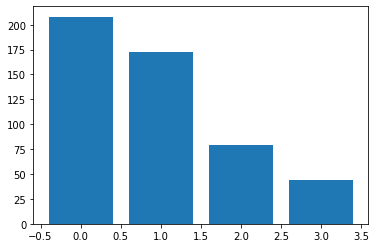

In [12]:
# Displaying the count of instances per predicted class.

from collections import Counter
counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution

plt.bar(counter.keys(), counter.values())
plt.show()

In [13]:
!pip install imblearn
!pip install imbalanced-learn

Class=0, n=208 (25.000%)
Class=2, n=208 (25.000%)
Class=1, n=208 (25.000%)
Class=3, n=208 (25.000%)


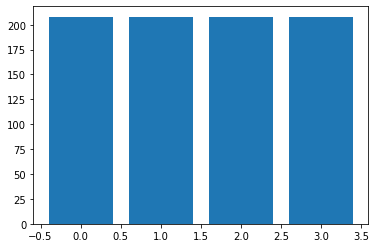

In [14]:
# SMOTE: Synthetic Minority Oversampling Technique.

from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE(random_state=7)
X, Y = oversample.fit_resample(X, Y)

# Summarize distribution.

counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# Plot the distribution.

plt.bar(counter.keys(), counter.values())
plt.show()


<font color='purple'><font size=8>Cross validation</font></font>

## is a technique used to find the optimal learning algorithm that can make accurate predictions and generalize well to unseen data. It involves determining the best way to divide the dataset into subsets for training and evaluation purposes.
The simplest approach, as illustrated in the figure below, involves three key sets in every machine learning algorithm:

Train set: Configured for learning and parameter estimation.

Validation set: Used for tuning hyperparameters, assessing predictive ability, and aiding in data preparation and feature selection. Validation is performed within the training set.

Test set: Provides an unbiased assessment of the final model's predictability for comparing and choosing between models.

In summary, model generation occurs through the training set, while performance evaluation is split between the validation and test sets. However, this division reduces the training data and can introduce randomness in set selection. An alternative to this is cross-validation (CV), which involves multiple rounds of sampling from the existing dataset, using different subsets each time.

Two common methods of cv are:

### 1. hold-out cv

This is one of the simplest data splitting methods, typically using an 80% training and 20% testing (or 90% and 10%) ratio. It's well-suited for large datasets, as it involves just one data split. This provides sample data for both training and testing the model's validity. However, it's important to note that this method may struggle with heterogeneous datasets, where sample independence in the selection of training and test sets is crucial. Another limitation is its inability to fine-tune hyperparameters, which can be addressed by employing a separate validation set. Yet, more flexible and reliable methods like nested cross-validation (nested CV) exist.

### 2. k-fold cv

K-fold cross-validation is a widely used method for model tuning and comparison. It involves dividing the original dataset into k subsets. Starting with the first subset (k=1) as the test set, the remaining k-1 subsets are used for training. The model's performance is evaluated on this test set, and the result is recorded. Repeating this process k times yields k independent models, each with its estimate (score) of model effectiveness. The final model score is obtained by calculating the average of these scores. This method allows for model comparison, helping us choose the one with the highest success rate.

The advantage of k-fold cross-validation is that it uses different subsets of the original data for both training and testing, providing better supervision for model evaluation. Choosing an appropriate value for k is essential. Larger k values generally lead to higher accuracy, but they come with increased time and computational costs. Additionally, for large k values, the original dataset must be sufficiently large to ensure the test set's size is suitable for model evaluation.

### 3. nested cv

Cross-validation (CV) is a method used for hyperparameter tuning and model comparison. One simple approach is to divide the data into three parts: a training set, a validation set, and a test set (figure below). The model is trained on the training set with various hyperparameter values, validated on the validation set, and its final performance is assessed on the test set. However, this method may not account for variability in the validation process and doesn't guarantee optimal hyperparameters.

Another common strategy is to use a hold-out method to create a test set and apply a different CV method to optimize hyperparameters on the training set. However, this approach provides only one test set, which can limit model evaluation.

A less favorable method, known as non-nested cross-validation, performs both validation and model evaluation on the same test set. This approach can introduce bias due to hyperparameter tuning.

#### To address these issues, nested k-fold cross-validation is used, involving two loops: an inner loop for hyperparameter tuning and an outer loop for comparing models with optimal hyperparameters. This method is computationally expensive, but it offers protection against overfitting and takes into account variability in both the test and validation sets.

In conclusion, CV determines the model with the highest predictive ability. It's essential when dealing with dependent data or small sample sizes. CV methods provide a comprehensive estimate of model performance, which depends on the number of iterations in k-fold or repeated k-fold. Finally, the optimal model is selected for predictions on new data after thorough evaluation with resampling methods.

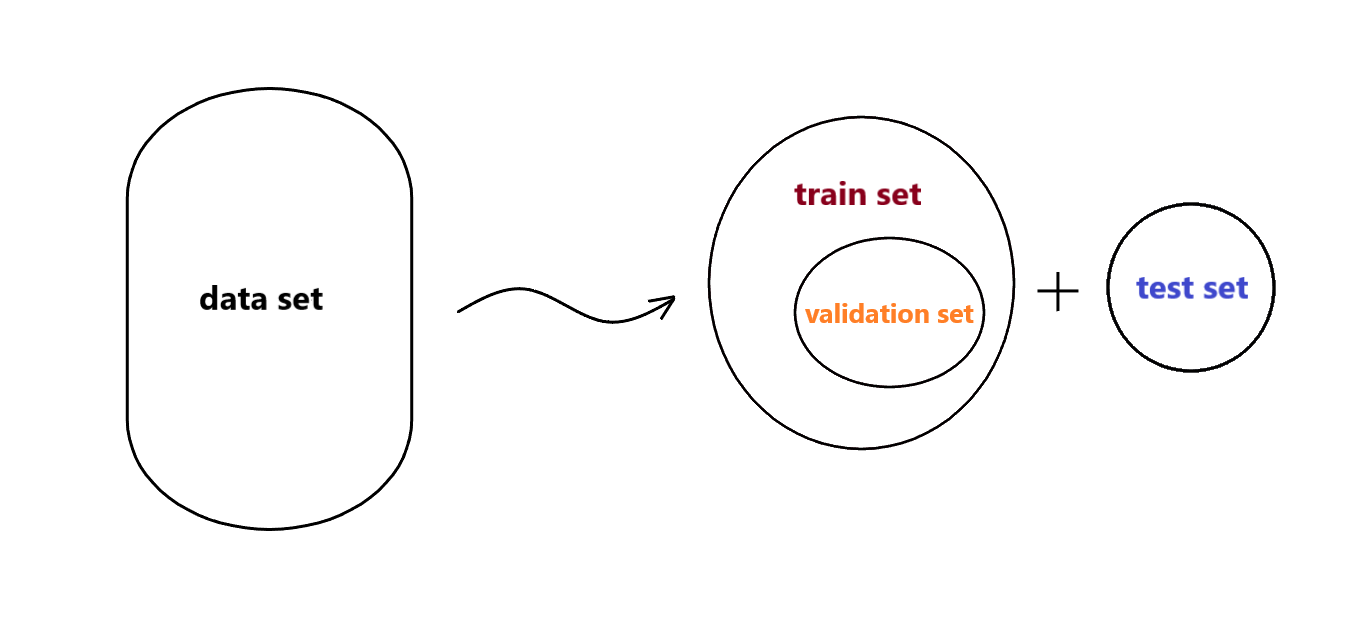

In [15]:
# Splitting dataset into training and test sets (hold-out cv).

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [16]:
# Training a Random forest.
# By default RandomForestClassifier is built by 100 trees (n_estimators=100), 
# so it makes no sense in showing through a graph how a random forest looks like! It's too complex!
# Also, the RandomForestClassifier function automatically handles multi-class problems.

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(random_state = 42)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

In [17]:
clf.n_estimators

100

In [18]:
# Accuracy metric.
# Testing how well the model predicts according with the test set.
# Y_test is the exact response values of the test set, and we want to check if they match with those predicted by the model.
# Pretty good performance of 0.84!(although we had overfitting! But that's the point in a random forest. It is overtrained but still highly accurate.)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.852


In [19]:
# Overall metrics.

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        69
           1       0.76      0.80      0.78        69
           2       0.92      0.85      0.88        66
           3       0.87      0.98      0.92        46

    accuracy                           0.85       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.85      0.85      0.85       250



<font color='red'><font size=8>Overfitting</font></font>

is a common issue that arises in the context of complex models when there is a scarcity of training examples relative to the numerous features. In such situations, the classifier's accuracy can exhibit significant discrepancies between the training data and various testing datasets used for validation. Overfitting is associated with a high degree of variance and indicates that the model is excessively focused on the training data, resulting in poor predictive performance on unseen testing data. To mitigate overfitting, one can either leverage a larger volume of data or simplify the model by reducing its dimensions, thus enhancing its ability to generalize. It's worth noting that models that are overly constrained as well as those that are overly flexible, are susceptible to overfitting and should be avoided.

## In summary, overfitting occurs when the classifier essentially memorizes the training set's outcomes rather than learning from them.

In [20]:
# We obviously expect overfitting since the trees in any Random Forest are unpruned (this is how a Random Forest is built).

clf.score(X_train,Y_train)

1.0

In [21]:
# Feature importance.

feature_list=list(X.columns)
feature_imp=pd.Series(clf.feature_importances_,index=feature_list).sort_values(ascending=False)

print(feature_imp)

MOCA-1                     0.069917
Vlong_M_r                  0.065413
MOCA-11                    0.057009
Vshort_M_r                 0.052209
Verb_Flu_r                 0.045335
Induct_Reason_r            0.044432
Age                        0.041898
MOCA-6                     0.038529
MOCA-10                    0.034520
MOCA-9                     0.033177
Work_M_r                   0.033072
Concentration_attention    0.028859
MOCA-4                     0.026349
MOCA-7                     0.026293
MOCA-2                     0.025197
education                  0.024233
NPIJ40S                    0.020761
GDS_9                      0.019742
NPIJ36S                    0.019375
Prosp_M_r                  0.016612
NPIJ40F                    0.015095
GDS_10                     0.012981
Antidepressants            0.012765
NPIJ35F                    0.012100
GDS_2                      0.012020
NPIJ36F                    0.011210
MOCA-8                     0.010768
GDS_5                      0

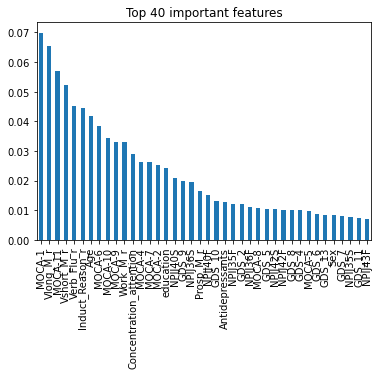

In [22]:
# Feature importance via plotting.

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='bar')
plt.title("Top 40 important features")
plt.show()

In [23]:
from numpy import std
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [24]:
# Training a Random forest with Nested cv (it takes about 2 minutes to run...).
# Setting f1_micro, f1_macro, recall_micro, recall_macro etc, depending on what we wish.
# Setting refit=True the model with the best parameters (best_estimator_) is automatically fitted to the entire data set.

clf=RandomForestClassifier(random_state = 42)
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6, 8, 10, 'sqrt']
search = GridSearchCV(clf, space, scoring='recall_micro', n_jobs=1, cv=cv_inner, refit=True)
scores = cross_val_score(search, X, Y, scoring='recall_micro', cv=cv_outer, n_jobs=-1)

# Report performance.

print('f1-micro score: %.3f (%.3f)' % (mean(scores), std(scores)))

f1-micro score: 0.880 (0.035)


In [25]:
search.fit(X, Y)
search.best_params_

{'max_features': 2, 'n_estimators': 500}

In [26]:
# We can be confident that this model has the optimal hyperparameters for the specific dataset, 
# as this is guaranteed by the nested CV method.
# Finally, we can apply this optimal model to the entire dataset to make predictions (the very last step),
# as its efficiency was validated through nested cross-validation on multiple subsets.

bestforest=search.best_estimator_
bestforest

RandomForestClassifier(max_features=2, n_estimators=500, random_state=42)

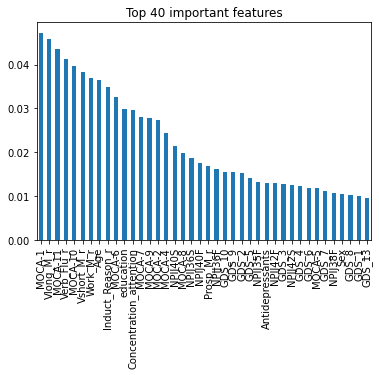

In [27]:
# Feature importance for the best model (bestforest).

feat_importances = pd.Series(bestforest.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='bar')
plt.title("Top 40 important features")
plt.show()

In [28]:
# Making predictions: Showing the Y values (the predictions) according the X values.

bestforest.predict(X_test)

array([1, 0, 1, 0, 2, 1, 0, 2, 2, 2, 3, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0,
       0, 3, 3, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 3, 1, 0, 0, 1, 3, 0, 0, 0,
       0, 1, 2, 1, 0, 0, 3, 1, 2, 3, 1, 1, 3, 1, 0, 2, 1, 0, 3, 1, 2, 0,
       0, 0, 2, 1, 2, 1, 1, 2, 0, 3, 2, 2, 1, 2, 3, 2, 3, 1, 2, 3, 3, 1,
       1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 3, 1, 1, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 3, 3, 2, 3, 2, 1, 2, 0, 1, 1, 0, 2,
       1, 1, 0, 3, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 2, 1, 3, 0, 1, 2, 1,
       1, 3, 3, 1, 0, 3, 0, 1, 1, 1, 3, 1, 0, 3, 3, 0, 0, 0, 2, 1, 2, 2,
       2, 1, 0, 3, 0, 2, 1, 2, 3, 2, 0, 0, 1, 3, 0, 1, 2, 3, 2, 1, 0, 1,
       2, 0, 3, 2, 0, 3, 1, 0, 1, 3, 0, 3, 0, 3, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 0, 2, 1, 3, 2, 3, 2, 0, 0, 3, 3, 1, 0, 3, 0, 1, 0, 2, 1, 0, 0,
       2, 3, 2, 1, 0, 0, 3, 3], dtype=int64)

In [29]:
bestforest.estimators_

[DecisionTreeClassifier(max_features=2, random_state=1608637542),
 DecisionTreeClassifier(max_features=2, random_state=1273642419),
 DecisionTreeClassifier(max_features=2, random_state=1935803228),
 DecisionTreeClassifier(max_features=2, random_state=787846414),
 DecisionTreeClassifier(max_features=2, random_state=996406378),
 DecisionTreeClassifier(max_features=2, random_state=1201263687),
 DecisionTreeClassifier(max_features=2, random_state=423734972),
 DecisionTreeClassifier(max_features=2, random_state=415968276),
 DecisionTreeClassifier(max_features=2, random_state=670094950),
 DecisionTreeClassifier(max_features=2, random_state=1914837113),
 DecisionTreeClassifier(max_features=2, random_state=669991378),
 DecisionTreeClassifier(max_features=2, random_state=429389014),
 DecisionTreeClassifier(max_features=2, random_state=249467210),
 DecisionTreeClassifier(max_features=2, random_state=1972458954),
 DecisionTreeClassifier(max_features=2, random_state=1572714583),
 DecisionTreeClass

<font size=8>ΟVO and OVA (or OVR)</font>

Many algorithms, such as Logistic Regression, decision trees, and SVM, are inherently binary classifiers. In cases where we have more than two response classes (multi-class), and we seek predictions for a single class (rather than multiple, as in the multi-label problem), these algorithms require modification to operate effectively. To address this, combinatorial methods have been developed. These methods utilize binary classification procedures to design multiple classifiers using ensemble classification techniques.

### 1.OVR:

The One-Versus-Rest (OvR) or One-Versus-All (OVA) technique produces k binary classifiers when there are k classes in the target variable. For an observation x (input value) and classes C₁, ..., Cₖ, k binary models (hypotheses) are created with the following output values:

* hi(x) = +1, if x ∈ Ci

* hi(x) = -1, otherwise 

This approach involves training k classifiers, with each one deciding based on the rule of  "one class compared to the sum of the others".

For instance, consider a dataset with a total of 1000 examples of fruits divided into four different classes: 500 examples of 'apple,' 300 of 'pear,' 100 of 'tangerine,' and 100 of 'banana.' The goal is to predict the correct class among these four. To achieve this, k classifiers (here k=4) are created for the following binary classification problems:

Classifier No.1: {apple} vs {pear, tangerine, banana}

Classifier No.2: {pear} vs {apple, tangerine, banana}

Classifier No.3: {tangerine} vs {pear, apple, banana}

Classifier No.4: {banana} vs {pear, apple, tangerine}

The initial training set is modified k times to reflect the true values of the response variable. For the training of each classifier, a value of +1 is assigned to 'positive' classes with single elements, while a value of -1 is assigned to 'negative' heterogeneous classes with multiplicity greater than or equal to 2.

The training is conducted using standard binary classification techniques, and the final prediction is based solely on those models that predict the 'positive' class (an individual class rather than a combination). From these models, the result with the highest probability (confidence score) is selected.

If only one classifier predicts the 'positive' class, it is selected without comparing probabilities.

To test performance on new, unseen data, the same process is applied to each instance in the test dataset as was done during model construction. If the accuracy meets expectations, the model can be relied upon for making predictions.

### 2.OVO:

One-Versus-One (OVO), in a multi-class problem, decomposes into k(k-1)/2 binary class optimization problems, creating all possible combinations between the different classes. Each training set consists of one class to predict against one (and only one) other class, resulting in k times 2 combinations (C(k,2)) for each classifier.

In this approach, a 'negative' class is not a combined class for which we are uncertain about the algorithm's prediction; instead, it is a class with a clear negative sign and a distinct outcome. For example, in a problem with 4 classes, the combinations would be as follows:

Classifier No.1: {apple} vs {pear}

Classifier No.2: {apple} vs {tangerine}

Classifier No.3: {apple} vs {banana}

Classifier No.4: {pear} vs {banana}

Classifier No.5: {pear} vs {tangerine}

Classifier No.6: {tangerine} vs {banana}

The final prediction is determined by a majority decision. Initially, +1 values are assigned to the classes on the left column and -1 for those on the right. For instance, if we receive the following predictions from these classifiers:

No.1 → +1 (apple)

No.2 → +1 (apple)

No.3 → -1 (banana)

No.4 → -1 (banana)

No.5 → -1 (tangerine)

No.6 → -1 (banana)

In this scenario, since most predictions are 'negative,' we determine which 'negative' class prevails. In this case, the 'banana' class would be the final prediction.


In [30]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [31]:
# Training ОVO algorithm with the default hyperparameters of the random forest.

clf= OneVsOneClassifier(RandomForestClassifier(random_state=60))
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

print('Precision-micro of OvO Classifier: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Recall-micro of OvO Classifier: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('f1-micro of OvO Classifier: {:.2f}'.format(f1_score(Y_test, y_pred, average='micro')))

Precision-micro of OvO Classifier: 0.85
Recall-micro of OvO Classifier: 0.85
f1-micro of OvO Classifier: 0.85


In [34]:
# Training ОVO algorithm with nested cv.
# Too slow (30 minutes)!
# Tuning hyperparameters with the OVO and OVR classifiers the 'estimator__' prefix is used for each hyperparameter we check.

clf=OneVsOneClassifier(RandomForestClassifier(random_state=6))
inner_cv = KFold(n_splits=5, shuffle= True, random_state=1)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
space=dict()
space['estimator__n_estimators']=[10, 100, 500]
space['estimator__max_features']=[2, 4, 6, 8, 10, 'sqrt']
space['estimator__criterion']=['gini','entropy']
search = GridSearchCV(clf, space, scoring='f1_micro', n_jobs=-1, cv=inner_cv, refit=True)
search.fit(X, Y)

nested_scores=cross_val_score(search, X, Y, scoring='f1_micro', cv=outer_cv, n_jobs=-1,error_score="raise")
nested_scores

array([0.86363636, 0.84090909, 0.79310345, 0.89655172, 0.86206897,
       0.86206897, 0.85057471, 0.82758621, 0.91954023, 0.82758621])

In [35]:
nested_scores.mean()

0.8543625914315569

In [41]:
# Training ОVR algorithm with the default hyperparameters of the random forest.

clf= OneVsRestClassifier(RandomForestClassifier(random_state=4))
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

print('Precision-micro of OvR Classifier: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Recall-micro of OvR Classifier: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('f1-micro of OvR Classifier: {:.2f}'.format(f1_score(Y_test, y_pred, average='micro')))

Precision-micro of OvR Classifier: 0.86
Recall-micro of OvR Classifier: 0.86
f1-micro of OvR Classifier: 0.86


In [24]:
# Training ОVR algorithm with nested cv.
# Too slow (30 minutes)!
# Tuning hyperparameters with the OVO and OVR classifiers the 'estimator__' prefix is used for each hyperparameter we check.

clf=OneVsRestClassifier(RandomForestClassifier(random_state=6))
inner_cv = KFold(n_splits=5, shuffle= True, random_state=1)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
space=dict()
space['estimator__n_estimators']=[10, 100, 500]
space['estimator__max_features']=[2, 4, 6, 8, 10, 'sqrt']
space['estimator__criterion']=['gini','entropy']
search = GridSearchCV(clf, space, scoring='f1_micro', n_jobs=-1, cv=inner_cv, refit=True)
search.fit(X, Y)

nested_scores=cross_val_score(search, X, Y, scoring='f1_micro', cv=outer_cv, n_jobs=-1,error_score="raise")
nested_scores

array([0.92857143, 0.88095238, 0.87951807, 0.80722892, 0.86746988,
       0.86746988, 0.84337349, 0.84337349, 0.91566265, 0.91566265])

In [25]:
nested_scores.mean()

0.8749282845668388

In [26]:
bestforest1=search.best_estimator_
bestforest1

OneVsRestClassifier(estimator=RandomForestClassifier(max_features=6,
                                                     n_estimators=500,
                                                     random_state=6))

<font color='salmon'><font size=8>Out-Of-Bag Error (OOB)</font></font>

The bootstrap technique involves repeatedly selecting data with replacement to construct random samples, which means that not all original data points are used in creating the Random Forest. The set of **observations that were not included** in the formation of the bootstrap samples is referred to as the **"out-of-bag" (OOB) sample**. The OOB error is the percentage of examples that were incorrectly classified using this OOB sample.

Remarkably, approximately **36.8%** of the original data is not used for training the model, given that each tree's OOB sample comprises about one-third of the original data and serves as a test set. Consequently, OOB error can be calculated without the traditional data splitting into training and test sets. This OOB error serves as an internal performance control mechanism, providing a robust alternative to conventional validation methods and benefiting from a larger training dataset.

In [32]:
clf=RandomForestClassifier(n_estimators=500,random_state = 42,oob_score = True)
clf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=42)

In [33]:
# The OOB score is an alternative metric for checking accuracy.

print(clf.oob_score_)

0.8608247422680413


In [34]:
print('Score: ', clf.score(X_test, Y_test))

Score:  0.868


<font size=10>LIME and SHAP: Interpretability methods</font>

### To be considered reliable, a machine learning model must make accurate predictions, be stable, and allow for easy interpretation. It is well-known that black box models lack mechanistic and causal explanations. Various interpretability techniques like LIME and SHAP, exist to interpret complex machine learning models.

<font size=8><font color='teal'>LIME</font></font>

Model-agnostic techniques assess how input variables impact output variables without needing to understand the model's internal workings. These methods can be applied to any model, making them flexible for comparing interpretability across different models trained on the same dataset. **LIME (Local Interpretable Model-Agnostic Explanations)** is one such method that offers 'post-interpretation.' It can be applied to both inherently interpretable models (e.g., decision trees with few branches or logistic regression with few variables) and black box models (e.g., ANN, ensemble methods). LIME interprets individual instances (**local explanations**) by creating surrogate models, approximating the black box model's predictions at specific points of interest. It constructs a new dataset, weights data points based on proximity, feeds them into the black box model, and trains a simple model for interpretation.

In [27]:
!pip install lime

In [28]:
import lime
from lime import lime_tabular

explainer=lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                           mode='classification',
                                           feature_names=X_train.columns.values,
                                            verbose=True,
                                           random_state=34)

In [57]:
# Interpret and predict the 2nd observation (j=1) of the test set
# Default value for 'num_features=10', displaying the 10 most important variables. 
# If 'top_labels=2', we get the results for the two most important classes predicted, even though only one is actually predicted.
# If 'top_labels=1', only the class predicted by the model, i.e., the one with the highest probability, is displayed.

j=1
exp=explainer.explain_instance(data_row=X_test.iloc[j],
                              predict_fn=bestforest.predict_proba,top_labels=1)
exp.show_in_notebook(show_table=True)

C:\Users\BILL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.06494793334773247
Prediction_local [0.24312066]
Right: 0.824


In [30]:
X_test.iloc[1:2]

,Age,Sex,education,GDS_1,GDS_2,GDS_3,GDS_4,GDS_5,GDS_6,GDS_7,GDS_8,GDS_9,GDS_10,GDS_11,GDS_12,GDS_13,GDS_14,GDS_15,Antidepressants,MOCA-1,MOCA-2,MOCA-4,MOCA-5,MOCA-6,MOCA-7,MOCA-8,MOCA-9,MOCA-10,MOCA-11,NPIJ32S,NPIJ32F,NPIJ33S,NPIJ33F,NPIJ34S,NPIJ34F,NPIJ35S,NPIJ35F,NPIJ36S,NPIJ36F,NPIJ37S,NPIJ37F,NPIJ38S,NPIJ38F,NPII39J,NPIJ39F,NPIJ40S,NPIJ40F,NPIJ41S,NPIJ41F,NPIJ42S,NPIJ42F,NPIJ43S,NPIJ43F,Prosp_M_r,Vshort_M_r,Vlong_M_r,Work_M_r,Verb_Flu_r,Induct_Reason_r,Concentration_attention
378,82,2,6.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,1.0,3.0,1.0,0.0,1.0,5.0,6.0,0,0.0,0,0,0.0,0,1,3,1.0,3.0,0,0,0,0,0,0,1.0,3.0,0,0,0.0,0.0,0,0,1,6,8,10,16,2,5.0


In [31]:
# True response value of the 2nd observation (of the test set).

Y_test.iloc[1:2]

378    0
Name: diagnosis, dtype: int64

In [32]:
# The bestmodel(aka bestforest) predicts that the 2nd observation of the test set is classified according to class "0" with probability 0.82 .
# We have an accurate forecast since the actual and the predicted value are identical.

out=bestforest.predict(X_test)
out[1]

0

<font size=8><font color='crimson'>SHAP</font></font>

The term 'Shapley values' is derived from the work of mathematician and economist Lloyd Stowell Shapley, who extensively studied Game Theory. According to this theory, Shapley values are employed as a solution to a problem where each participant pursues their individual interests independently, yet cooperation is essential to maximize overall profits. In simpler terms, Shapley values aim to provide an unequal but fair distribution of profits to all contributors, achieving an optimal solution.

The Shapley value represents the expected marginal contribution of a factor across all possible combinations. In the context of machine learning, Shapley values illustrate how each feature (akin to a player in a game) impacts the prediction relative to the mean prediction, essentially quantifying the deviation of each prediction from the mean value.

Shapley values are founded on a robust mathematical framework, characterized by properties such as efficiency, symmetry, linearity, and absence of dummy players. These properties ensure reliability, even when approximations are required for computation. Shapley values also offer **global interpretability**, not limited to **local** interpretations.

However, Shapley values come with certain disadvantages. Firstly, they do not lead to the construction of predictive models like LIME does. Secondly, their high computational cost often makes it practically infeasible to calculate them. Another limitation is that Shapley values involve all features in their calculations, which can be problematic when seeking interpretation based on a subset of variables.

The **SHAP method (SHapley Additive exPlanations)** aims to address these weaknesses. It represents **Shapley values as components of an additive features model**, typically a linear model. This approach allows for the inclusion of selected variables, making it easier to interpret the contribution of specific variables to the final prediction.

In [100]:
!pip install shap

In [101]:
import shap
shap.initjs()

In [102]:
# Calculation of the shapley values through SHAP model for each observation of the test set (if we wanted to interpret an example of the training set we would have X_train as an argument).
# shap.TreeExplainer speeds up Shapley value calculations.

class_names = ['0', '1', '2', '3']
explainer=shap.TreeExplainer(bestforest)
shap_values = explainer.shap_values(X_test)
shap_values

[array([[-0.00186085,  0.00321464, -0.03499675, ...,  0.00058451,
          0.00494341, -0.00966128],
        [-0.02253839,  0.00731921, -0.02575835, ...,  0.00196026,
         -0.00040367,  0.00569694],
        [ 0.0095354 ,  0.00288751, -0.0122203 , ...,  0.00077193,
         -0.00866228,  0.00041821],
        ...,
        [ 0.01966362, -0.00681857,  0.01965409, ...,  0.00143952,
          0.01198795,  0.00403839],
        [ 0.00865331, -0.0124283 ,  0.00351409, ...,  0.00073267,
         -0.00287575, -0.00576813],
        [-0.00670937,  0.00328155, -0.00461536, ...,  0.00033243,
         -0.00293663,  0.00064632]]),
 array([[ 0.0137093 ,  0.01027426,  0.04264743, ...,  0.00251465,
          0.00663738,  0.00468603],
        [ 0.01510875,  0.00165444,  0.02661835, ...,  0.00114667,
          0.00206883, -0.00172441],
        [ 0.002245  ,  0.00903267,  0.01584849, ...,  0.00160078,
          0.00742734,  0.00299353],
        ...,
        [-0.00921197, -0.00247904, -0.01360657, ...,  

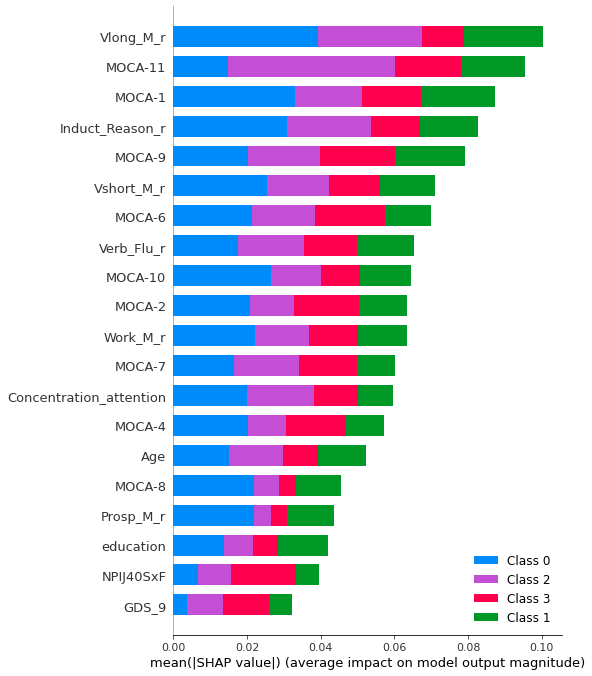

In [103]:
# Feature importance (grobal explanations).
# Apart from the classic feature importance we also have the effect of each variable and output class.

shap.summary_plot(shap_values[0:], X_test, plot_type="bar")

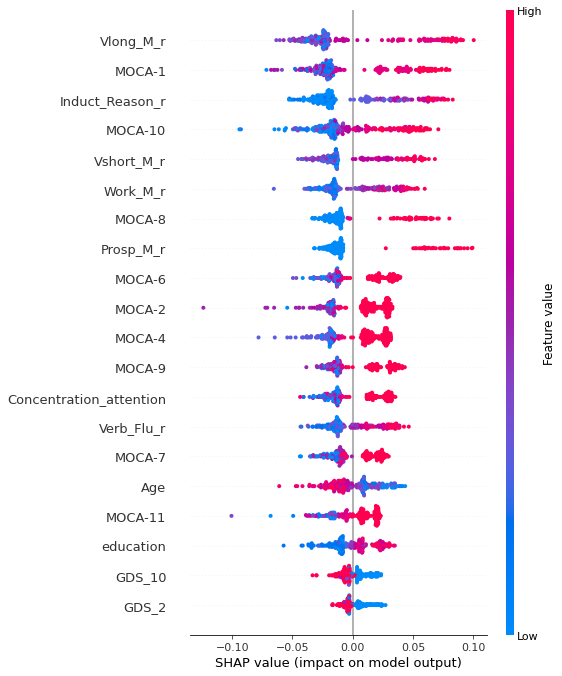

In [104]:
# Global explanations.
# Each of the points in the summary plot is the Shapley value of a feature/variable for a specific example/patient.
# Feature importance is determined by considering the effect of each variable or attribute based on their high or low values.
# Refers to class "0".

shap.summary_plot(shap_values[0], X_test.values, feature_names = X.columns)

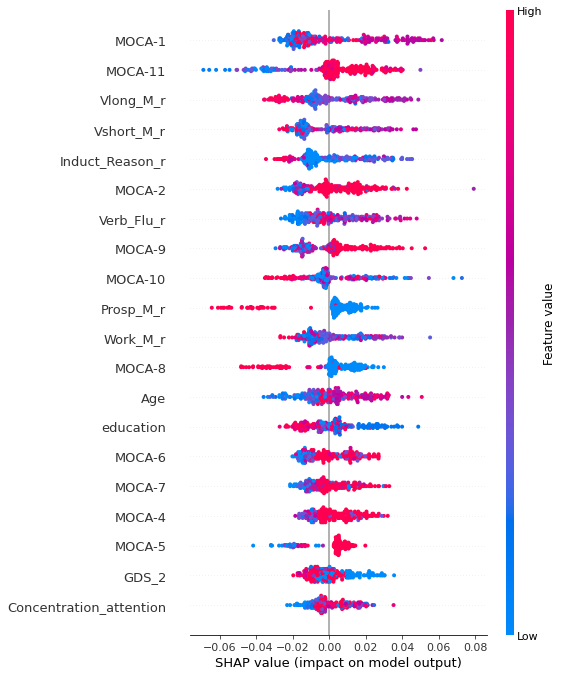

In [38]:
# Global explanations.
# Each of the points in the summary plot is the Shapley value of a feature/variable for a specific example/patient.
# Feature importance is determined by considering the effect of each variable or attribute based on their high or low values.
# Refers to class "1".

shap.summary_plot(shap_values[1], X_test.values, feature_names = X.columns)

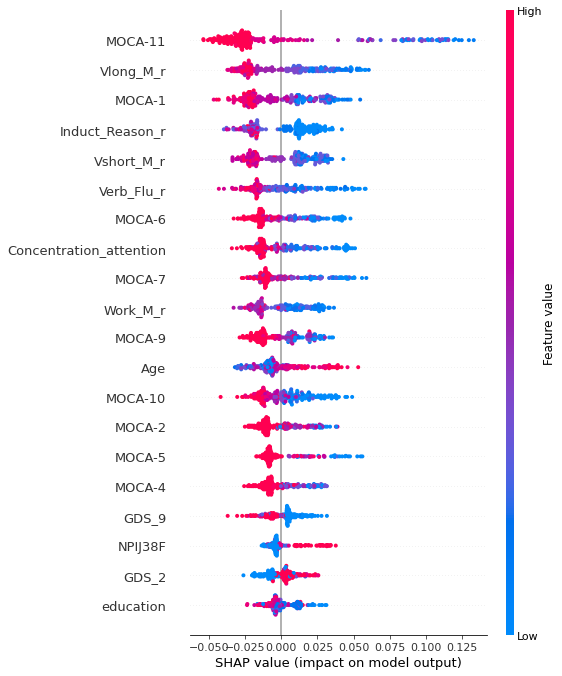

In [39]:
# Global explanations.
# Each of the points in the summary plot is the Shapley value of a feature/variable for a specific example/patient.
# Feature importance is determined by considering the effect of each variable or attribute based on their high or low values.
# Refers to class "2".

shap.summary_plot(shap_values[2], X_test.values, feature_names = X.columns)

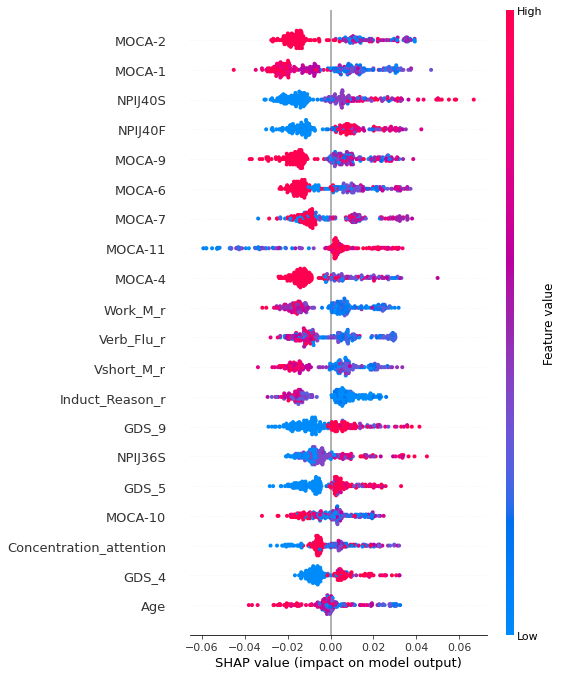

In [40]:
# Global explanations.
# Each of the points in the summary plot is the Shapley value of a feature/variable for a specific example/patient.
# Feature importance is determined by considering the effect of each variable or attribute based on their high or low values.
# Refers to class "3".

shap.summary_plot(shap_values[3], X_test.values, feature_names = X.columns)

In [41]:
# Local interpretation for the 2nd observation of the test set (actually it is the 378th observation of the original set X).

i=1
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test.values[i], feature_names = X.columns)

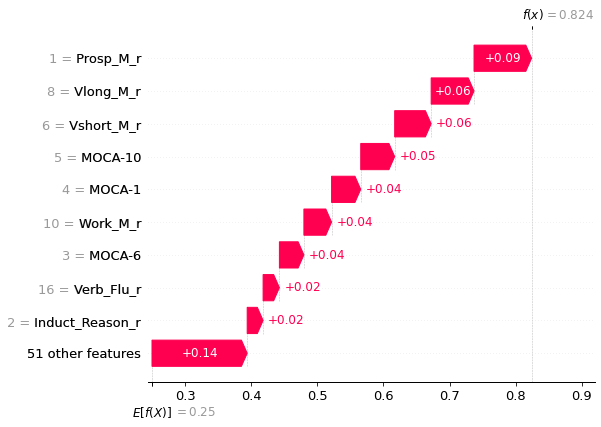

In [42]:
# Local interpretation for the 2nd observation of the test set (an alternative scheme and also the preferred one).

row =1
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

In [43]:
X_test.iloc[1:2]

,Age,Sex,education,GDS_1,GDS_2,GDS_3,GDS_4,GDS_5,GDS_6,GDS_7,GDS_8,GDS_9,GDS_10,GDS_11,GDS_12,GDS_13,GDS_14,GDS_15,Antidepressants,MOCA-1,MOCA-2,MOCA-4,MOCA-5,MOCA-6,MOCA-7,MOCA-8,MOCA-9,MOCA-10,MOCA-11,NPIJ32S,NPIJ32F,NPIJ33S,NPIJ33F,NPIJ34S,NPIJ34F,NPIJ35S,NPIJ35F,NPIJ36S,NPIJ36F,NPIJ37S,NPIJ37F,NPIJ38S,NPIJ38F,NPII39J,NPIJ39F,NPIJ40S,NPIJ40F,NPIJ41S,NPIJ41F,NPIJ42S,NPIJ42F,NPIJ43S,NPIJ43F,Prosp_M_r,Vshort_M_r,Vlong_M_r,Work_M_r,Verb_Flu_r,Induct_Reason_r,Concentration_attention
378,82,2,6.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,1.0,3.0,1.0,0.0,1.0,5.0,6.0,0,0.0,0,0,0.0,0,1,3,1.0,3.0,0,0,0,0,0,0,1.0,3.0,0,0,0.0,0.0,0,0,1,6,8,10,16,2,5.0
